In [1]:
%matplotlib inline

from dicom_utils import *
import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
#import assd_func as af
from skimage import morphology
import matplotlib.patches as mpatches
import assd_func_Sobel_2 as af_Sobel
from parameter_tuning_func import *

In [2]:
dicom_dir = "1"
output_dir = "Output"
images, slices, contours, labels, dummy_mask = main(dicom_dir, output_dir)

# Femural Heads

In [3]:
#Find location of the contour where labels == 5 (bladder)
a = np.argwhere(labels==True)
a[a[..., 3] == 6][0]

array([ 60, 235, 148,   6], dtype=int64)

(-0.5, 511.5, 511.5, -0.5)

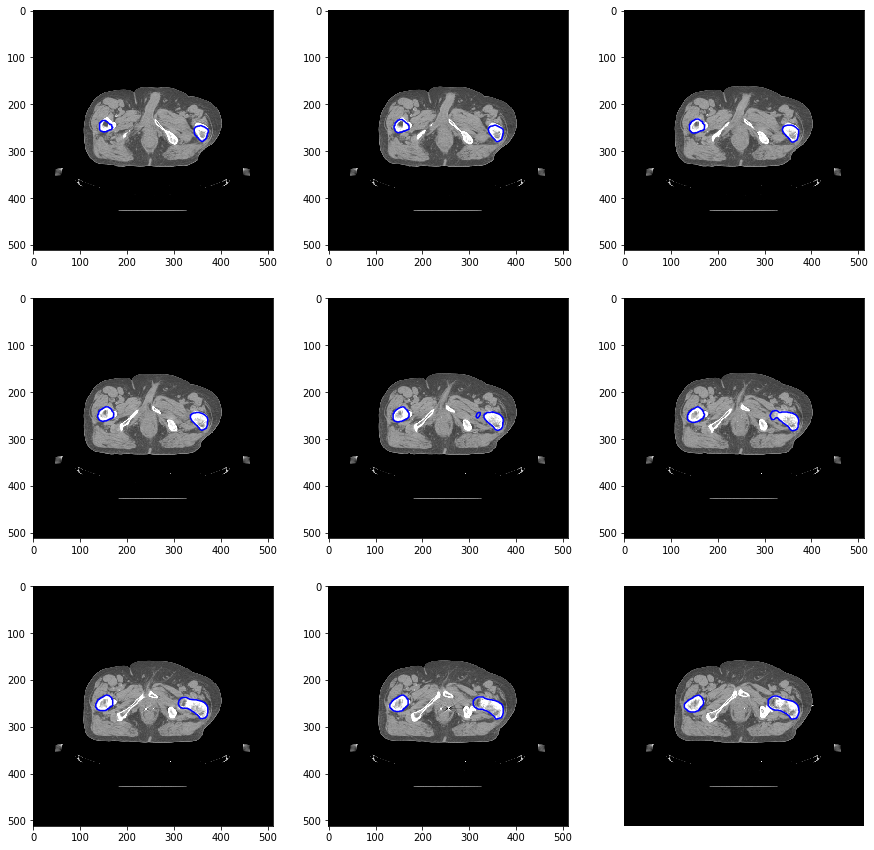

In [4]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 60, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels[..., 6][i + 60, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [4]:
target_img1 = images[63, ...]
target_label1 = labels[..., 6][63, ...]

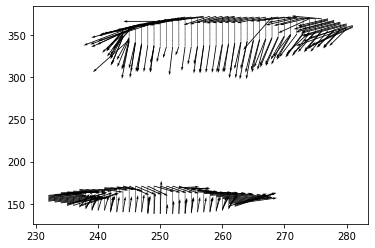

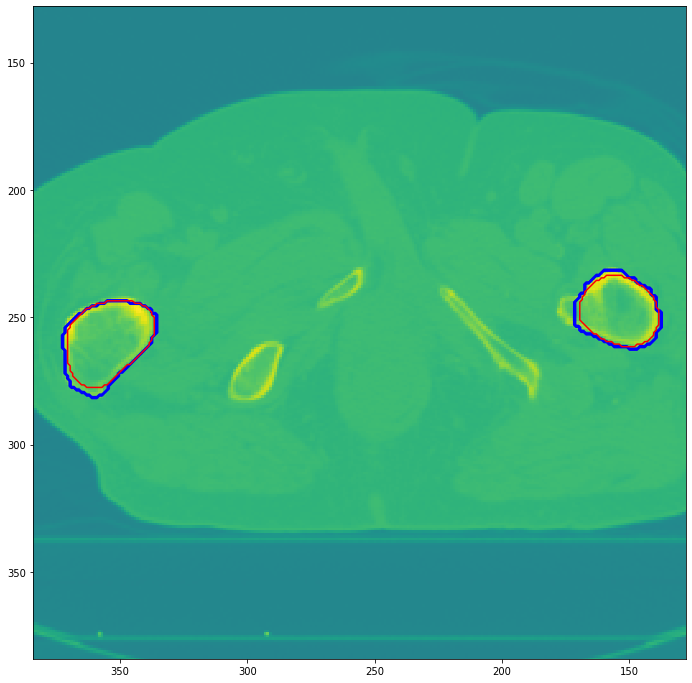

In [6]:
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 30
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 30
circles = 3
organ_id = 6
seed=123
dx, dy, mask, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img1, target_label1, voxelsize, a, SD, circles, seed, k, w, images, labels, organ_id, smooth=True)
du_1 = af_Sobel.plotting_assd(dx, dy, mask, target_img1, quiver=True, plot=True, display=True)

# Paremeter Experimentation¶
1. Different c*SD

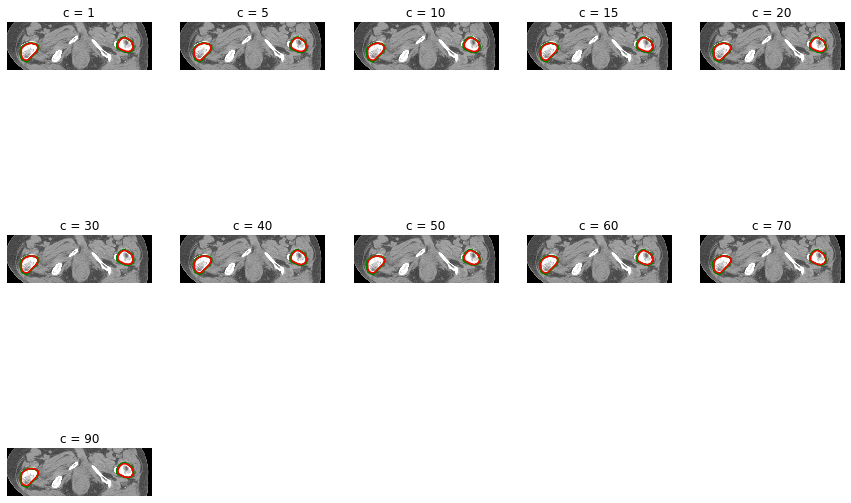

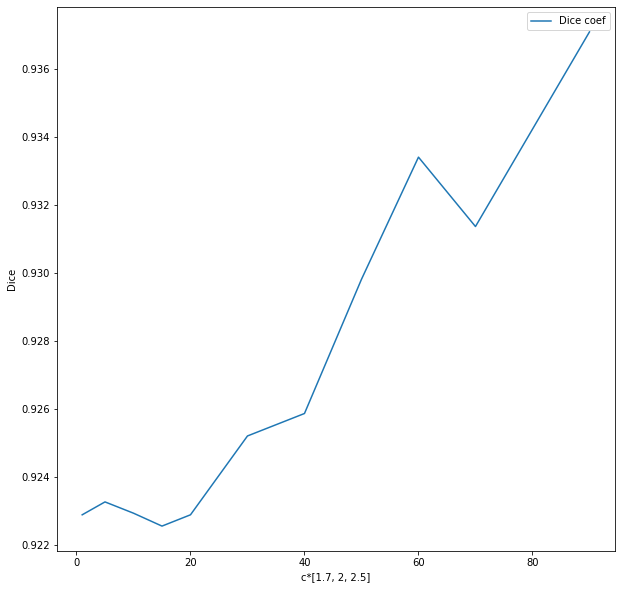

In [7]:
c_list = [1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 90]
SD = [0.7, 0.7, 3]
organ_id=6
df = find_c(target_img1, target_label1, images, labels, c_list, SD, organ_id, xlim = [400, 100], ylim = [300, 200], plot_dice=True)

# Different k working with best c*SD

10*[1.7, 2, 2.5]


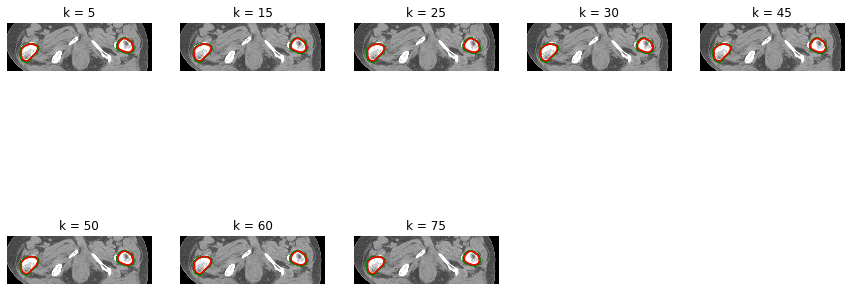

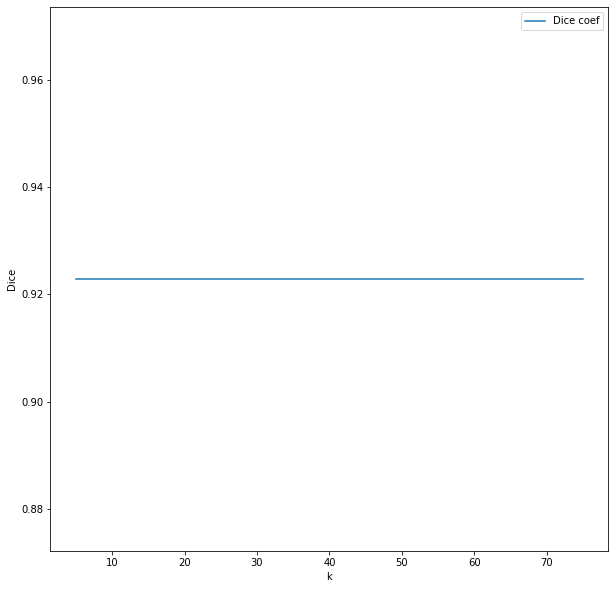

In [24]:
k_list = [5, 15, 25, 30, 45, 50, 60, 75]
c = 10
df = find_k(target_img1, target_label1, images, labels, k_list, c, SD, organ_id, df, xlim = [400, 100], ylim = [300, 200], plot_dice=True)
#df.write_csv(destination_path + "Dice_log_Rectum.csv")

15*[1.7, 2, 2.5]


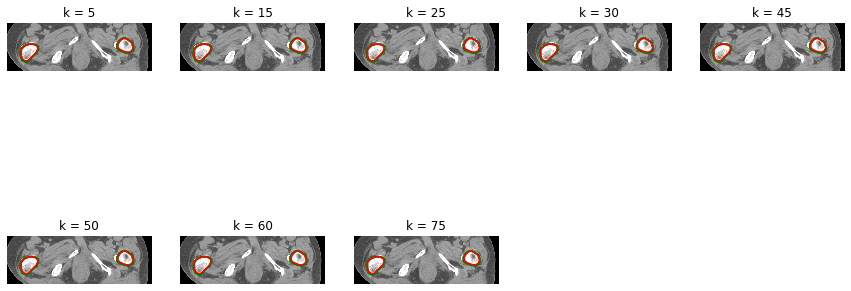

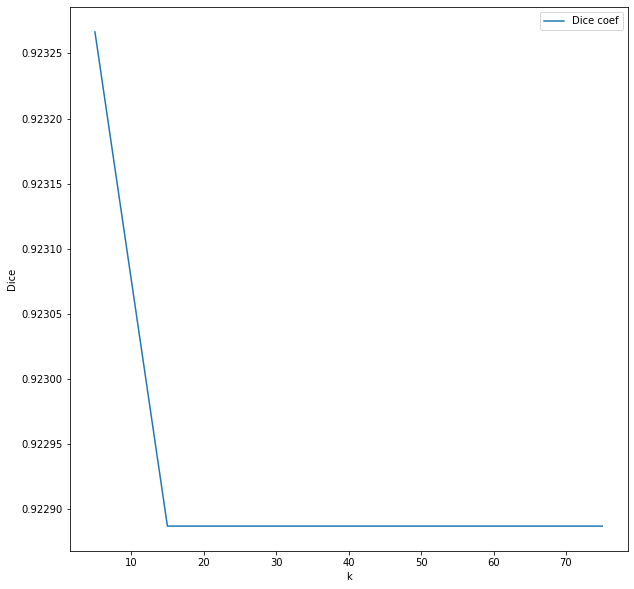

In [17]:
k_list = [5, 15, 25, 30, 45, 50, 60, 75]
c = 15
df = find_k(target_img1, target_label1, images, labels, k_list, c, SD, organ_id, df,xlim = [400, 100], ylim = [300, 200], plot_dice=True)
#df.write_csv(destination_path + "Dice_log_Rectum.csv")

20*[1.7, 2, 2.5]


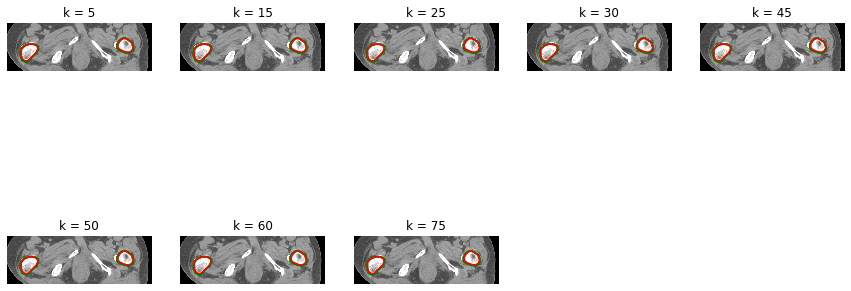

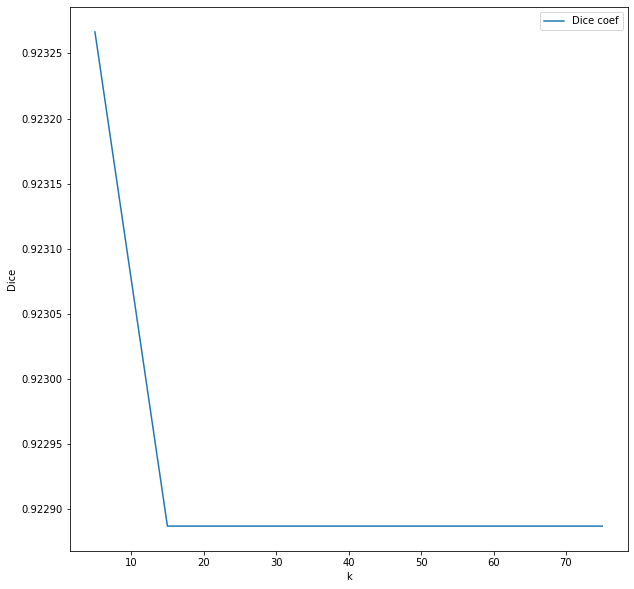

In [18]:
k_list = [5, 15, 25, 30, 45, 50, 60, 75]
c = 20
df = find_k(target_img1, target_label1, images, labels, k_list, c, SD, organ_id, df,xlim = [400, 100], ylim = [300, 200], plot_dice=True)

# Different ismax working with best w, k and c*SD

SD: 30*[1.7, 2, 2.5]
k: 15


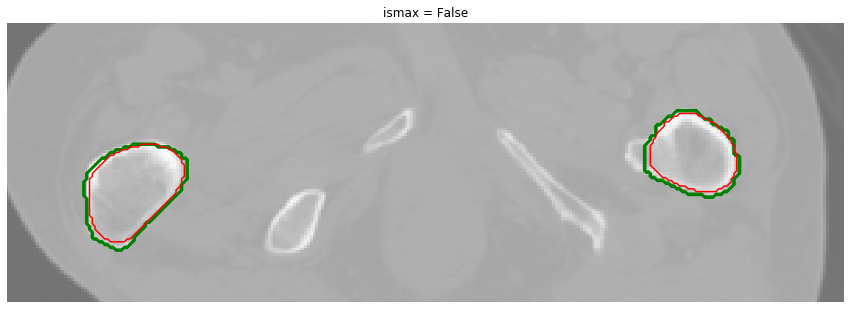

In [25]:
w = 2
k = 15
c = 30
df = find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, organ_id, df,xlim = [400, 100], ylim = [300, 200], ismax=False, plot_dice=True)

SD: 15*[1.7, 2, 2.5]
k: 15


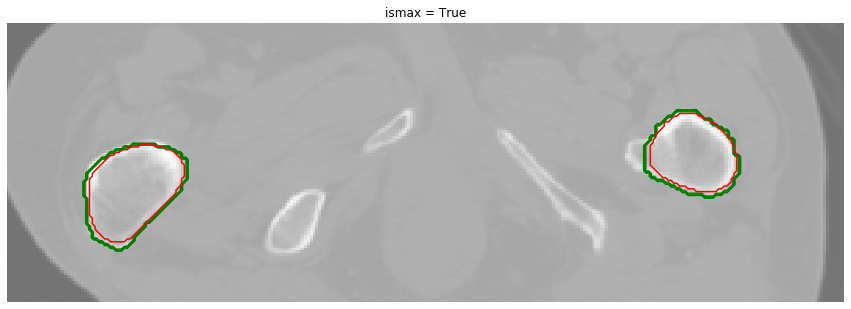

In [19]:
w = 2
k = 15
c = 15
df = find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, organ_id, df,xlim = [400, 100], ylim = [300, 200], ismax=True, plot_dice=True)

SD: 15*[1.7, 2, 2.5]
k: 15


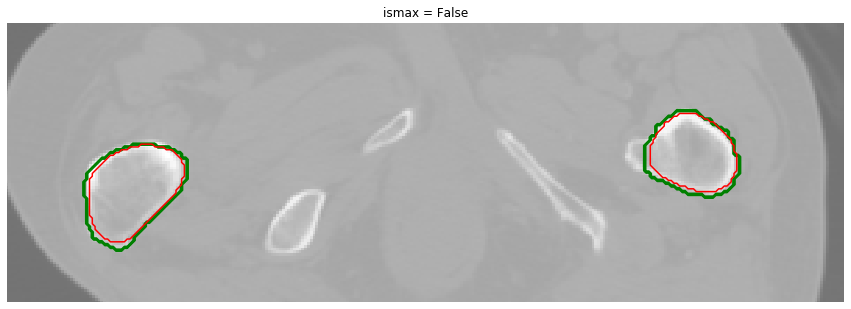

In [20]:
w = 2
k = 15
c = 15
df = find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, organ_id, df,xlim = [400, 100], ylim = [300, 200], ismax=False, plot_dice=True)

SD: 20*[1.7, 2, 2.5]
k: 15


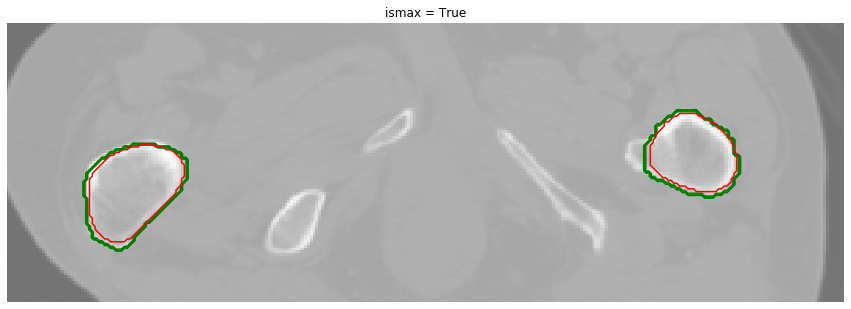

In [22]:
w = 2
k = 15
c = 20
df = find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, organ_id, df, xlim = [400, 100], ylim = [300, 200], ismax=True, plot_dice=True)

SD: 20*[1.7, 2, 2.5]
k: 15


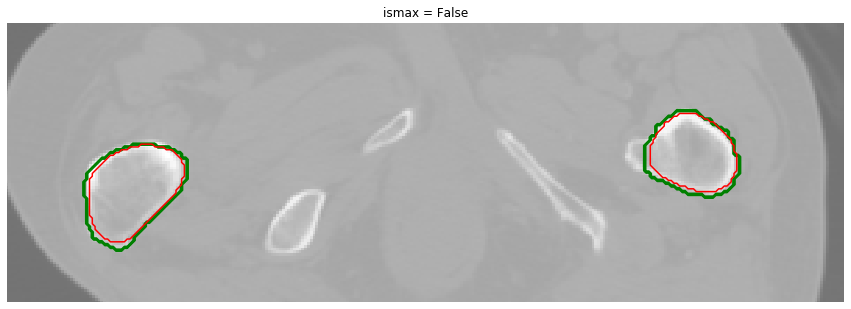

In [23]:
w = 2
k = 15
c = 20
df = find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, organ_id, df, xlim = [400, 100], ylim = [300, 200], ismax=False, plot_dice=True)

# Best set of parameters on different slide

In [ ]:
roi_number = 6 #bladder
assd_contour_rectum = a_different_slices(images, labels, roi_number, roi_z, SD, c, k, w, organ_id, ismax=False, xlim = [200, 300], ylim = [300, 200], plot=True)